In [ ]:
!pip install pyod
!pip install ta
!pip install newspaper3k spacy networkx matplotlib
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=6da51e123a57778a1cb14c055dde41d945d30fe8e2bf4ee5a27a4bec816b9990
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 6.6 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=ti

In [ ]:
# Importing Necessary Libraries
# These libraries will be used for data manipulation, visualization, model building, and evaluation.
import pandas as pd
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

In [ ]:
# Load the dataset
data = pd.read_csv('/content/WRCDF.csv', parse_dates=["Date"])
data.sort_values("Date", inplace=True)
data.set_index("Date", inplace=True)
print('data shape', data.shape)
data.info()
# Display the first few rows of the dataset
print(data.head(3))

data shape (2343, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2343 entries, 2013-02-14 to 2022-06-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2343 non-null   float64
 1   High       2343 non-null   float64
 2   Low        2343 non-null   float64
 3   Close      2343 non-null   float64
 4   Adj Close  2343 non-null   float64
 5   Volume     2343 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 128.1 KB
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2013-02-14  25.420000  25.450001  25.400000  25.450001  25.006012     688
2013-02-15  25.450001  25.450001  25.450001  25.450001  25.006012       0
2013-02-19  25.549999  25.549999  25.549999  25.549999  25.104269    1013


In [ ]:
print(data.isnull().sum())
data.duplicated().sum()
data

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-02-14,25.420000,25.450001,25.400000,25.450001,25.006012,688
2013-02-15,25.450001,25.450001,25.450001,25.450001,25.006012,0
2013-02-19,25.549999,25.549999,25.549999,25.549999,25.104269,1013
2013-02-20,26.000000,26.000000,25.750000,25.750000,25.300777,346
2013-02-21,25.750000,25.750000,25.750000,25.750000,25.300777,0
...,...,...,...,...,...,...
2022-05-27,0.003500,0.003500,0.003500,0.003500,0.003500,200
2022-05-31,0.003500,0.003500,0.003500,0.003500,0.003500,0
2022-06-01,0.003500,0.003500,0.003500,0.003500,0.003500,0


In [ ]:
# Calculate daily returns
data["Return"] = data["Close"].pct_change().fillna(0)
# Combine Close price, Return, and Volume into a feature set for anomaly detection
features = data[["Close", "Return", "Volume"]]
model = IForest()
#model.fit(data[['Return']])
model.fit(features)
#data['Anomaly'] = model.predict(data[['Return']])  # 1 = outlier
data["Anomaly"] = model.predict(features)
#data[data['Anomaly'] == 1]
data

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


,Open,High,Low,Close,Adj Close,Volume,Return,Anomaly
Date,,,,,,,,
2013-02-14,25.420000,25.450001,25.400000,25.450001,25.006012,688,0.000000,0
2013-02-15,25.450001,25.450001,25.450001,25.450001,25.006012,0,0.000000,0
2013-02-19,25.549999,25.549999,25.549999,25.549999,25.104269,1013,0.003929,0
2013-02-20,26.000000,26.000000,25.750000,25.750000,25.300777,346,0.007828,0
2013-02-21,25.750000,25.750000,25.750000,25.750000,25.300777,0,0.000000,0
...,...,...,...,...,...,...,...,...
2022-05-27,0.003500,0.003500,0.003500,0.003500,0.003500,200,0.346154,1
2022-05-31,0.003500,0.003500,0.003500,0.003500,0.003500,0,0.000000,0
2022-06-01,0.003500,0.003500,0.003500,0.003500,0.003500,0,0.000000,0


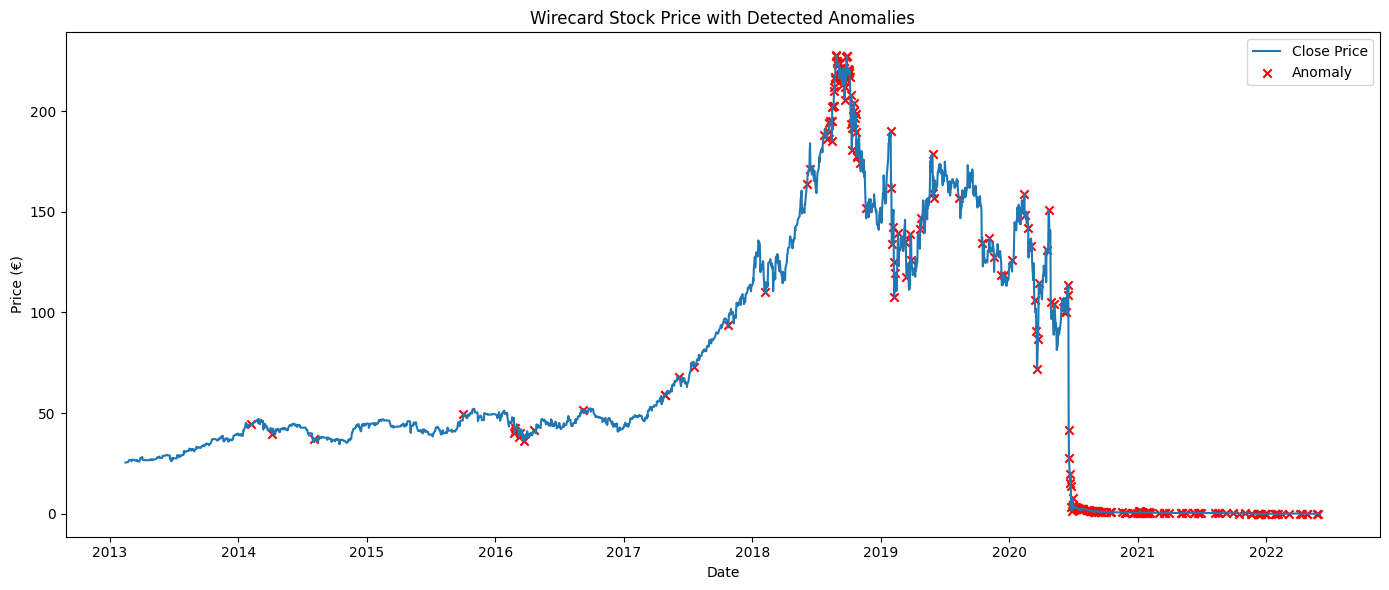

In [ ]:
# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(data.index, data["Close"], label="Close Price")
plt.scatter(data[data["Anomaly"] == 1].index, data[data["Anomaly"] == 1]["Close"],
            color="red", label="Anomaly", marker="x")
plt.title("Wirecard Stock Price with Detected Anomalies")
plt.xlabel("Date")
plt.ylabel("Price (€)")
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


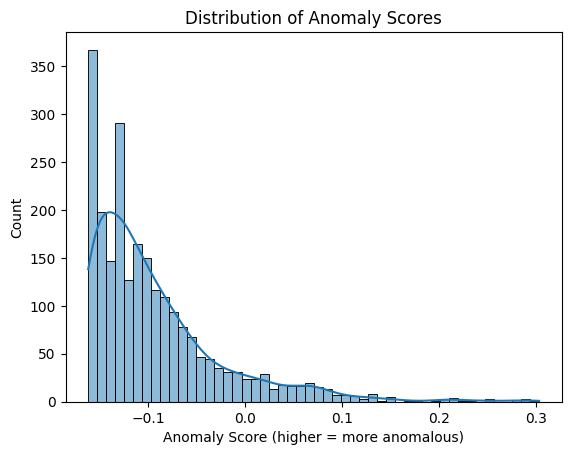

In [ ]:
import seaborn as sns

# Get raw anomaly scores
#data["anomaly_score"] = model.decision_function(data[["Return"]])
data["Anomaly_Score"] = model.decision_function(features)

sns.histplot(data["Anomaly_Score"], bins=50, kde=True)
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score (higher = more anomalous)")
plt.show()

<ipython-input-8-54c976ba6558>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'lag_{i}'] = df['Close'].shift(i)
<ipython-input-8-54c976ba6558>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'lag_{i}'] = df['Close'].shift(i)


Model Evaluation on Anomaly Period:
📉 Mean Squared Error (MSE): 545.8152
📈 Root Mean Squared Error (RMSE): 23.3627
📏 Mean Absolute Error (MAE): 18.6560
🔍 R² Score: 0.9078


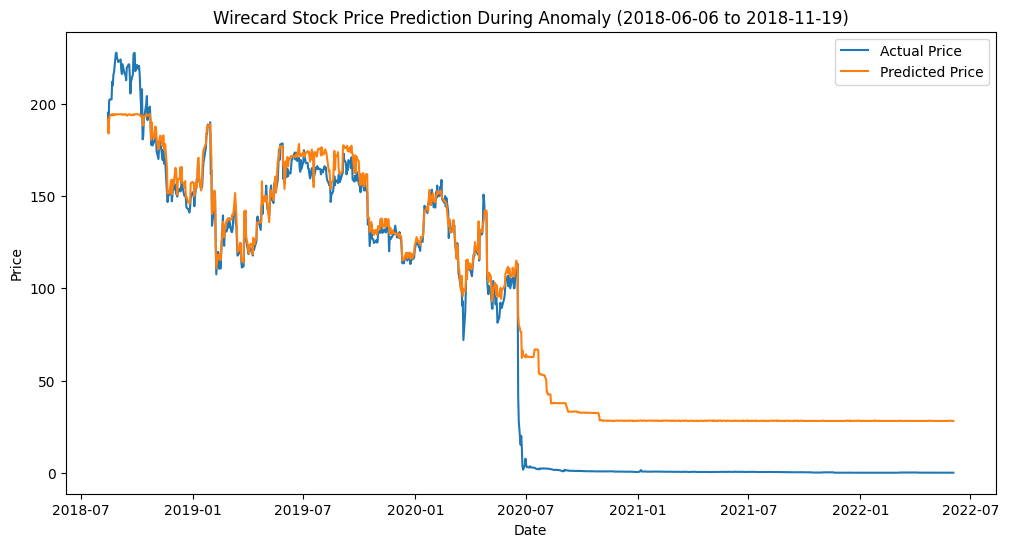

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# --- Step 1: Create lag features ---
def create_lag_features(df, lag_days):
    df = df.copy()
    for i in range(1, lag_days + 1):
        df[f'lag_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df
# Create lag features (e.g. last 5 days)
data = create_lag_features(data, lag_days=100)
# --- Step 3: Define periods ---
train_start = '2013-02-14'
train_end = '2018-08-13'
anomaly_start = '2018-08-14'
anomaly_end = '2022-06-03'
# Filter training and prediction data
train_data = data[(data.index >= train_start) & (data.index <= train_end)]
predict_data = data[(data.index >= anomaly_start) & (data.index <= anomaly_end)]
# --- Step 4: Split features and target ---
X_train = train_data.drop(['Close'], axis=1)
y_train = train_data['Close']
X_predict = predict_data.drop(['Close'], axis=1)
y_actual = predict_data['Close']  # Ground truth for anomaly period
# --- Step 5: Train XGBoost and Predict ---
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_predict)
# --- Step 6: Evaluate and Plot ---
# Calculate metrics
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

# Print results
print("Model Evaluation on Anomaly Period:")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📈 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📏 Mean Absolute Error (MAE): {mae:.4f}")
print(f"🔍 R² Score: {r2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_actual.index, y_actual, label='Actual Price')
plt.plot(y_actual.index, y_pred, label='Predicted Price')
plt.title('Wirecard Stock Price Prediction During Anomaly (2018-06-06 to 2018-11-19)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

<ipython-input-9-d10e9f8a71e4>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['vol_lag1'] = df['Volume'].shift(1)
<ipython-input-9-d10e9f8a71e4>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['vol_ma3'] = df['Volume'].rolling(3).mean().shift(1)
<ipython-input-9-d10e9f8a71e4>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

📊 Model Evaluation on Anomaly Period:
📉 Mean Squared Error (MSE): 815.1479
📈 Root Mean Squared Error (RMSE): 28.5508
📏 Mean Absolute Error (MAE): 23.8526
🔍 R² Score: 0.8622


<ipython-input-9-d10e9f8a71e4>:65: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


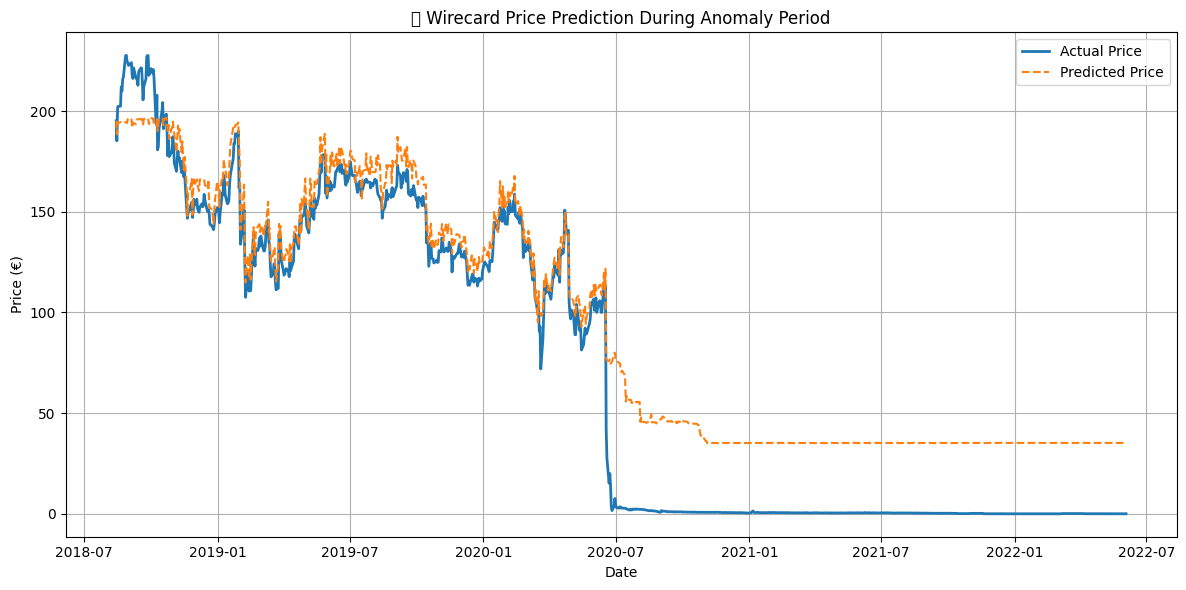

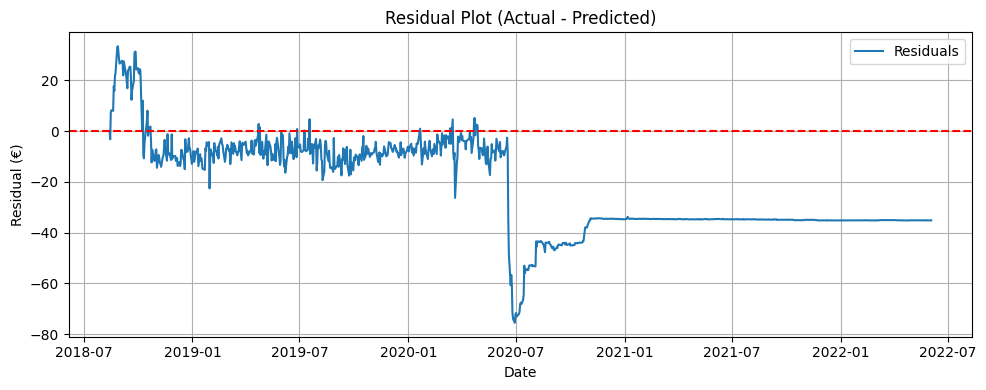

In [ ]:
def create_features(df, lag_days=100):
    df = df.copy()
    # Return
    df['return'] = df['Close'].pct_change()
    # Lagged Close Prices
    for i in range(1, lag_days + 1):
        df[f'lag_{i}'] = df['Close'].shift(i)
    # Volume-based features
    df['vol_lag1'] = df['Volume'].shift(1)
    df['vol_ma3'] = df['Volume'].rolling(3).mean().shift(1)
    df['vol_ma5'] = df['Volume'].rolling(5).mean().shift(1)
    df['price_x_volume'] = df['Close'] * df['Volume']
    df['return_x_volume'] = df['return'] * df['Volume']

    df.dropna(inplace=True)
    return df
# Apply features
df = create_features(data)
# --------------------------
# SET DATE RANGES
# --------------------------
train_start = '2013-02-14'
train_end = '2018-08-13'
anomaly_start = '2018-08-14'
anomaly_end = '2022-06-03'
train_data = df[(df.index >= train_start) & (df.index <= train_end)]
predict_data = df[(df.index >= anomaly_start) & (df.index <= anomaly_end)]
# --------------------------
# SPLIT FEATURES / TARGET
# --------------------------
X_train = train_data.drop(['Close'], axis=1)
y_train = train_data['Close']
X_predict = predict_data.drop(['Close'], axis=1)
y_actual = predict_data['Close']
# --------------------------
# TRAIN XGBOOST MODEL
# --------------------------
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)
# Predict during anomaly
y_pred = model.predict(X_predict)
# --------------------------
# EVALUATE MODEL
# --------------------------
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
print("📊 Model Evaluation on Anomaly Period:")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📈 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📏 Mean Absolute Error (MAE): {mae:.4f}")
print(f"🔍 R² Score: {r2:.4f}")
# --------------------------
# PLOT RESULTS
# --------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_actual.index, y_actual, label='Actual Price', linewidth=2)
plt.plot(y_actual.index, y_pred, label='Predicted Price', linestyle='--')
plt.title('📈 Wirecard Price Prediction During Anomaly Period')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# --------------------------
# OPTIONAL: Residual Plot
# --------------------------
residuals = y_actual - y_pred
plt.figure(figsize=(10, 4))
plt.plot(residuals.index, residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Actual - Predicted)')
plt.xlabel('Date')
plt.ylabel('Residual (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Model Evaluation on Anomaly Period:
📉 Mean Squared Error (MSE): 662.6235
📈 Root Mean Squared Error (RMSE): 25.7415
📏 Mean Absolute Error (MAE): 21.1377
🔍 R² Score: 0.8880


<ipython-input-10-0992426c8078>:75: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


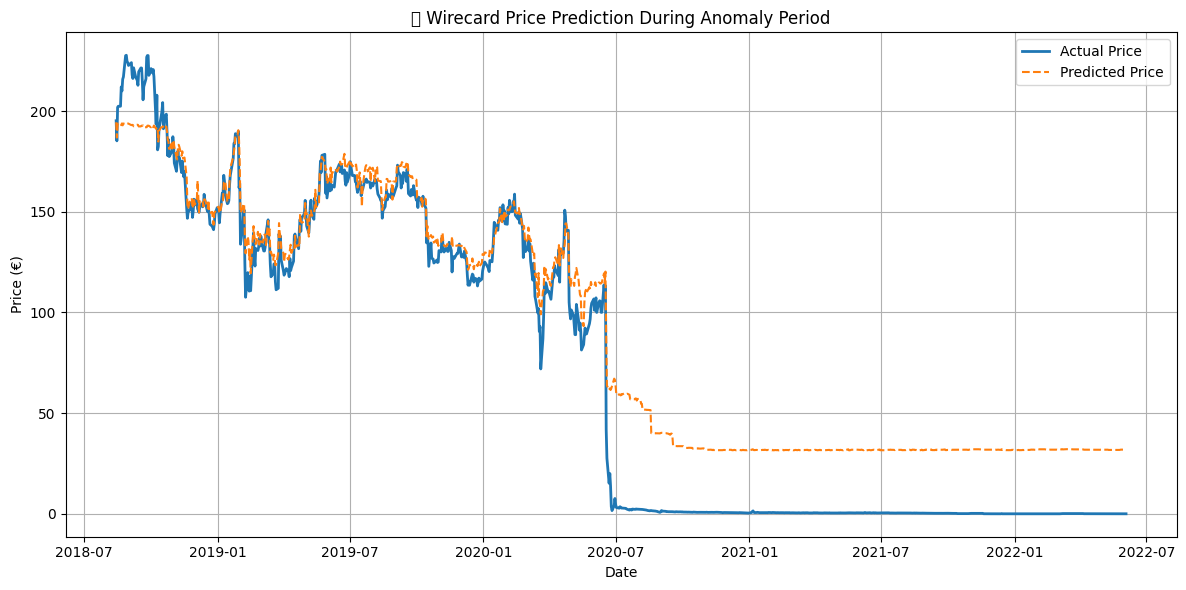

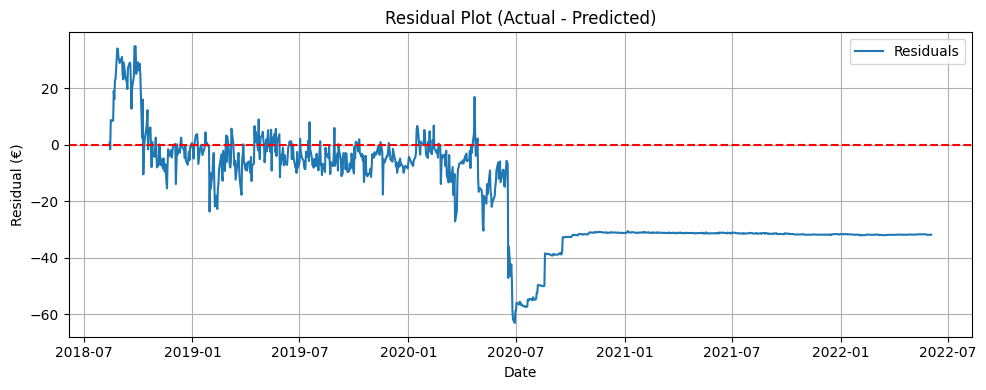

In [ ]:
import ta
# Technical Analysis library
def create_features(df, lag_days=5):
    df = df.copy()
    # Calculate return
    df['return'] = df['Close'].pct_change()
    # Lagged close prices
    for i in range(1, lag_days + 1):
        df[f'lag_{i}'] = df['Close'].shift(i)
    # Volume-based features
    df['vol_lag1'] = df['Volume'].shift(1)
    df['vol_ma3'] = df['Volume'].rolling(3).mean().shift(1)
    df['vol_ma5'] = df['Volume'].rolling(5).mean().shift(1)
    df['price_x_volume'] = df['Close'] * df['Volume']
    df['return_x_volume'] = df['return'] * df['Volume']
    # RSI
    df['rsi'] = ta.momentum.RSIIndicator(close=df['Close'], window=14).rsi()
    # MACD
    macd = ta.trend.MACD(close=df['Close'])
    df['macd'] = macd.macd()
    df['macd_signal'] = macd.macd_signal()
    df['macd_diff'] = macd.macd_diff()
    # Volatility (rolling std of returns)
    df['volatility'] = df['return'].rolling(window=10).std()
    df.dropna(inplace=True)
    return df
# Apply all features
df = create_features(data)
# --------------------------
# SET DATE RANGES
# --------------------------
train_start = '2013-02-14'
train_end = '2018-08-13'
anomaly_start = '2018-08-14'
anomaly_end = '2022-06-03'
train_data = df[(df.index >= train_start) & (df.index <= train_end)]
predict_data = df[(df.index >= anomaly_start) & (df.index <= anomaly_end)]
# --------------------------
# SPLIT FEATURES AND TARGET
# --------------------------
X_train = train_data.drop(['Close'], axis=1)
y_train = train_data['Close']
X_predict = predict_data.drop(['Close'], axis=1)
y_actual = predict_data['Close']
# --------------------------
# TRAIN XGBOOST MODEL
# --------------------------
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_predict)
# --------------------------
# EVALUATE MODEL
# --------------------------
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
print("📊 Model Evaluation on Anomaly Period:")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📈 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📏 Mean Absolute Error (MAE): {mae:.4f}")
print(f"🔍 R² Score: {r2:.4f}")
# --------------------------
# PLOT RESULTS
# --------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_actual.index, y_actual, label='Actual Price', linewidth=2)
plt.plot(y_actual.index, y_pred, label='Predicted Price', linestyle='--')
plt.title('📈 Wirecard Price Prediction During Anomaly Period')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# --------------------------
# RESIDUALS PLOT
# --------------------------
residuals = y_actual - y_pred
plt.figure(figsize=(10, 4))
plt.plot(residuals.index, residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Actual - Predicted)')
plt.xlabel('Date')
plt.ylabel('Residual (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Model Evaluation on Anomaly Period:
📈 Accuracy: 0.5349
📃 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56       601
           1       0.42      0.65      0.51       358

    accuracy                           0.53       959
   macro avg       0.56      0.56      0.53       959
weighted avg       0.59      0.53      0.54       959



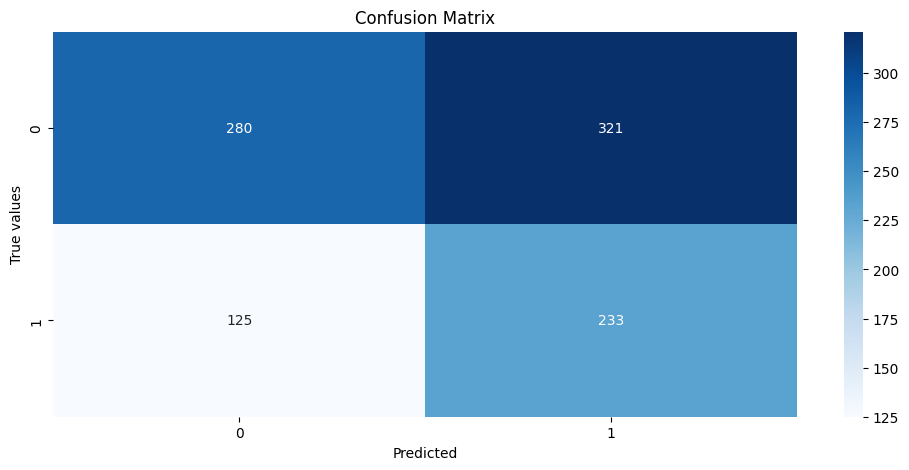

In [ ]:
import ta  # Technical Analysis library
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------
# FEATURE ENGINEERING
# --------------------------

def create_features(df, lag_days=5):
    df = df.copy()
    # Calculate return
    df['return'] = df['Close'].pct_change()
    # Lagged close prices
    for i in range(1, lag_days + 1):
        df[f'lag_{i}'] = df['Close'].shift(i)
    # Volume-based features
    df['vol_lag1'] = df['Volume'].shift(1)
    df['vol_ma3'] = df['Volume'].rolling(3).mean().shift(1)
    df['vol_ma5'] = df['Volume'].rolling(5).mean().shift(1)
    df['price_x_volume'] = df['Close'] * df['Volume']
    df['return_x_volume'] = df['return'] * df['Volume']
    # RSI
    df['rsi'] = ta.momentum.RSIIndicator(close=df['Close'], window=14).rsi()
    # MACD
    macd = ta.trend.MACD(close=df['Close'])
    df['macd'] = macd.macd()
    df['macd_signal'] = macd.macd_signal()
    df['macd_diff'] = macd.macd_diff()

    # Volatility (rolling std of returns)
    df['volatility'] = df['return'].rolling(window=10).std()

    df.dropna(inplace=True)
    return df

# Apply features
df = create_features(data)
# --------------------------
# CREATE TARGET (UP/DOWN LABEL)
# --------------------------
# Create target: 1 for price goes up, 0 for price goes down
df['target'] = (df['return'].shift(-1) > 0).astype(int)
# --------------------------
# SET DATE RANGES
# --------------------------
train_start = '2013-02-14'
train_end = '2018-08-13'
anomaly_start = '2018-08-14'
anomaly_end = '2022-06-03'

train_data = df[(df.index >= train_start) & (df.index <= train_end)]
predict_data = df[(df.index >= anomaly_start) & (df.index <= anomaly_end)]
# --------------------------
# SPLIT FEATURES AND TARGET
# --------------------------
X_train = train_data.drop(['Close', 'target'], axis=1)
y_train = train_data['target']
X_predict = predict_data.drop(['Close', 'target'], axis=1)
y_actual = predict_data['target']
# --------------------------
# TRAIN XGBOOST CLASSIFIER
# --------------------------
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100)
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_predict)
# --------------------------
# EVALUATE MODEL
# --------------------------
accuracy = accuracy_score(y_actual, y_pred)
print("📊 Model Evaluation on Anomaly Period:")
print(f"📈 Accuracy: {accuracy:.4f}")
print("📃 Classification Report:")
print(classification_report(y_actual, y_pred))
# --------------------------
# CONFUSION MATRIX
# --------------------------
fig = plt.figure(figsize=(12, 5))
sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True values")
plt.show()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load model and tokenizer (you can change this model if needed)
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Sentiment mapping: text → numeric score
sentiment_map = {
    "very negative": -2,
    "negative": -1,
    "neutral": 0,
    "positive": 1,
    "very positive": 2
}

def analyze_sentiment(text):
    """
    Analyze sentiment of article text using a BERT model.
    Returns:
        - sentiment label: 'very negative', ..., 'very positive'
        - numeric score: -2 to 2
    """
    try:
        inputs = tokenizer(
            text,
            return_tensors="pt",
            truncation=True,
            padding="max_length",
            max_length=512
        )

        with torch.no_grad():
            outputs = model(**inputs)
            probs = softmax(outputs.logits, dim=1)

        pred_class = torch.argmax(probs, dim=1).item()
        labels = ["very negative", "negative", "neutral", "positive", "very positive"]
        label = labels[pred_class]
        score = sentiment_map[label]

        return label, score  # ✅ returns exactly two values

    except Exception as e:
        print(f"Sentiment analysis error: {e}")
        return "unknown", 0  # default fallback

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
from datetime import datetime
import requests
from bs4 import BeautifulSoup
# Function to extract article date from various sources
def get_article_date(url):
    """Extract the publication date of the article from the URL."""
    try:
        res = requests.get(url, timeout=10)
        res.raise_for_status()  # Raise error for bad responses (4xx, 5xx)
        soup = BeautifulSoup(res.text, 'html.parser')

        # Try to find the article date in the <meta> tag
        meta_date = soup.find('meta', {'property': 'article:published_time'})
        if meta_date:
            return meta_date['content']
        # If no meta tag, try to find <time> tag
        time_tag = soup.find('time')
        if time_tag and 'datetime' in time_tag.attrs:
            return time_tag['datetime']
        # Try searching for <div> with common class names for dates
        date_div = soup.find('div', class_='published') or soup.find('div', class_='date')
        if date_div:
            return date_div.get_text(strip=True)

        # If no date is found, attempt to extract date from the URL
        # Example: 'https://example.com/2019/06/18/...')
        url_parts = url.split('/')
        for part in url_parts:
            try:
                # Try to convert part to a date
                date = datetime.strptime(part, '%Y-%m-%d')
                return date.strftime('%Y-%m-%d')  # Return as a formatted date
            except ValueError:
                continue
        return "Date not found"
    except Exception as e:
        return f"Error fetching date: {e}"

In [ ]:
import time
import random
from googlesearch import search

# 1. Fetch URLs from Google Search (2013-2020)
def fetch_urls_from_google():
    sites = [
        "ft.com", "reuters.com", "dw.com", "bloomberg.com",
        "bbc.com", "cnn.com", "nytimes.com", "theguardian.com"
    ]
    queries = [
        f"Wirecard site:{site} after:2013-01-01 before:2020-12-31"
        for site in sites
    ]
    all_urls = []

    for query in queries:
     print(f"Searching: {query}")
     try:
        for url in search(query, stop=20, pause=random.uniform(5, 15)):
            all_urls.append(url)
     except Exception as e:
        print(f"Error fetching results for {query}: {e}")
    time.sleep(random.uniform(10, 30))  # Back off randomly

    all_urls = list(set(all_urls))
    print(f"\n✅ Found {len(all_urls)} unique Wirecard-related URLs:")
    return all_urls

In [ ]:
# 2. Scrape article content from a URL
def scrape_article(url):
    """Scrape article content and extract publication date."""
    try:
        res = requests.get(url, timeout=10)
        res.raise_for_status()  # Will raise an exception for bad responses (4xx, 5xx)
        soup = BeautifulSoup(res.text, 'html.parser')
        # Extract article content
        article = soup.find('article') or soup.find('div', class_='article-content') or soup.find('div', class_='main-content')
        if article:
            content = ' '.join(p.text for p in article.find_all('p'))
        else:
            content = "Article content not found."
        # Extract article date
        article_date = get_article_date(url)
        return content, article_date
    except Exception as e:
        return f"Error scraping article: {e}", None

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_entity_pairs(text):
    doc = nlp(text)
    pairs = []
    for sent in doc.sents:
        sent_doc = nlp(sent.text)
        entities = [ent.text for ent in sent_doc.ents if ent.label_ in ('ORG', 'PERSON', 'GPE')]
        if len(entities) >= 2:
            for i in range(len(entities)):
                for j in range(i + 1, len(entities)):
                    pairs.append((entities[i], entities[j]))
    return pairs

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_entity_graph(G, min_edge_weight=2, max_nodes=30):
    # Step 1: Filter by edge weight
    filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >= min_edge_weight]
    subG = G.edge_subgraph(filtered_edges).copy()

    # Step 2: Remove isolated nodes
    subG.remove_nodes_from(list(nx.isolates(subG)))

    # Step 3: Limit to top N most connected nodes (if still messy)
    if len(subG.nodes) > max_nodes:
        degrees = dict(subG.degree())
        top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:max_nodes]
        subG = subG.subgraph(top_nodes).copy()

    # Step 4: Draw with improved layout
    plt.figure(figsize=(18, 14))
    pos = nx.spring_layout(subG, k=0.6, iterations=100)

    # Draw nodes
    nx.draw_networkx_nodes(subG, pos, node_size=1800, node_color='lightblue', edgecolors='black')

    # Draw edges
    weights = [subG[u][v]['weight'] for u, v in subG.edges()]
    nx.draw_networkx_edges(subG, pos, width=[w * 0.5 for w in weights], edge_color='gray')

    # Draw labels
    nx.draw_networkx_labels(subG, pos, font_size=12, font_weight='bold')

    plt.title(f"Entity Co-occurrence Graph (≥{min_edge_weight} mentions, max {max_nodes} nodes)", fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
import networkx as nx
import time
def scrape_and_analyze_all_articles(urls):
    all_scraped_articles = []
    entity_graph = nx.Graph()

    for url in urls:
        print(f"Scraping: {url}")
        content, date = scrape_article(url)
        sentiment, sentiment_score = analyze_sentiment(content)

        # Extract entity pairs for the graph
        entity_pairs = extract_entity_pairs(content)
        for src, tgt in entity_pairs:
            if entity_graph.has_edge(src, tgt):
                entity_graph[src][tgt]['weight'] += 1
            else:
                entity_graph.add_edge(src, tgt, weight=1)

        all_scraped_articles.append({
            'url': url,
            'content': content,
            'sentiment': sentiment,
            'sentiment_score': sentiment_score,
            'article_date': date
        })

        time.sleep(2)  # avoid rate-limiting

    # Optional: draw graph
    draw_entity_graph(entity_graph, min_edge_weight=2, max_nodes=30)

    return all_scraped_articles, entity_graph

In [ ]:
def correlate_sentiment_with_stock(articles, stock_data):
    # Example: We assume article date is known (if we had the article date, we'd fetch it)
    for article in articles:
        article_date = article['article_date']
        if article_date != "Date not found":
            # Check if the date exists in the stock data
            if article_date in stock_data.index:
                article['Anomaly'] = stock_data.loc[article_date]['Anomaly']
                article['stock_price'] = stock_data.loc[article_date]['Close']
                article['daily_return'] = stock_data.loc[article_date]['Return']
        else:
            article['stock_price'] = None
            article['daily_return'] = None
    return articles

In [ ]:
print("Fetching URLs...")
urls = fetch_urls_from_google()

Fetching URLs...
Searching: Wirecard site:ft.com after:2013-01-01 before:2020-12-31
Searching: Wirecard site:reuters.com after:2013-01-01 before:2020-12-31
Searching: Wirecard site:dw.com after:2013-01-01 before:2020-12-31
Searching: Wirecard site:bloomberg.com after:2013-01-01 before:2020-12-31
Searching: Wirecard site:bbc.com after:2013-01-01 before:2020-12-31
Searching: Wirecard site:cnn.com after:2013-01-01 before:2020-12-31
Searching: Wirecard site:nytimes.com after:2013-01-01 before:2020-12-31
Searching: Wirecard site:theguardian.com after:2013-01-01 before:2020-12-31

✅ Found 123 unique Wirecard-related URLs:


Scraping articles and analyzing sentiment...
Scraping: https://www.theguardian.com/business/2017/dec/20/payments-regulator-urged-to-prevent-atm-deserts-uk
Scraping: https://professional.ft.com/en-gb/blog/the-netflix-documentary-on-the-wirecard-scandal/
Scraping: https://www.reuters.com/article/world/uk/very-clear-wirecard-deposit-certificate-was-spurious-bpi-ceo-says-idUSKBN23T1EO/
Scraping: https://www.theguardian.com/business/2020/jun/25/wirecard-files-for-insolvency-amid-german-accounting-scandal
Scraping: https://www.bbc.com/news/business-53132953
Scraping: https://www.ft.com/content/534e7c4d-3101-3f6a-abc8-dc70beab35b7
Scraping: https://www.dw.com/en/wirecards-missing-billions-not-in-the-philippines-central-bank-says/a-53892369
Scraping: https://www.reuters.com/article/technology/timeline-the-rise-and-fall-of-wirecard-idUSKCN24V1HJ/
Scraping: https://www.dw.com/ru/%D1%84%D0%B8%D0%BD%D0%B0%D0%BD%D1%81%D0%BE%D0%B2%D1%8B%D0%B9-%D1%81%D0%BA%D0%B0%D0%BD%D0%B4%D0%B0%D0%BB-%D0%B2%D0%B5%D

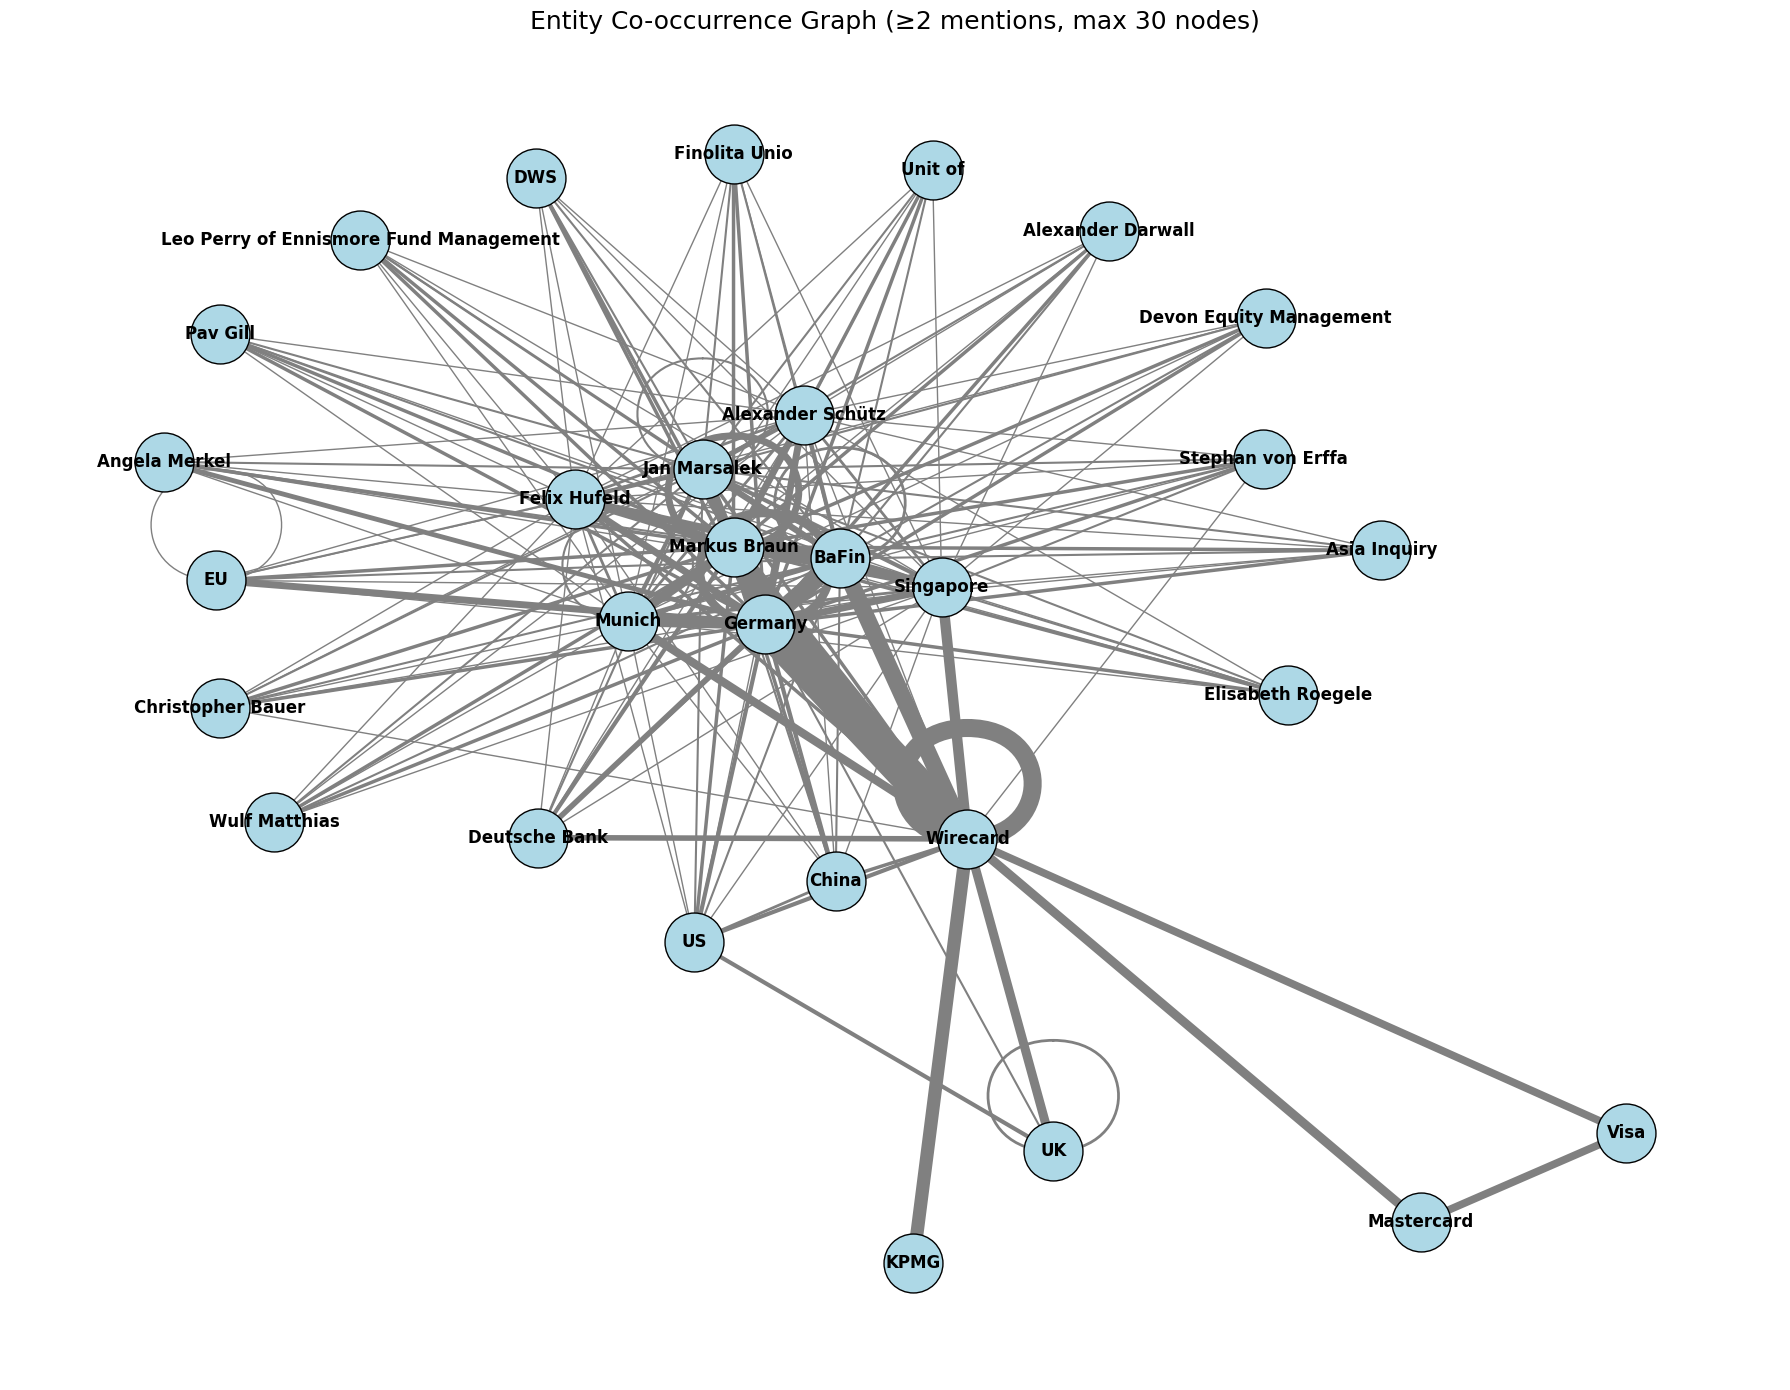

In [ ]:
print("Scraping articles and analyzing sentiment...")
scraped_articles = scrape_and_analyze_all_articles(urls)

In [ ]:
# Fetch stock data for Wirecard
print("Fetching stock data...")
print("Correlating sentiment with stock data...")
correlated_articles = correlate_sentiment_with_stock(scraped_articles, data)

Fetching stock data...
Correlating sentiment with stock data...


TypeError: list indices must be integers or slices, not str

In [ ]:
# Save the results to a CSV file
print(f"Saving {len(correlated_articles)} articles with sentiment to CSV...")
articles_df = pd.DataFrame(correlated_articles)
articles_df.to_csv('/content/scraped_wirecard_articles_with_sentiment_and_stock.csv', index=False)
print("Saved articles to 'scraped_wirecard_articles_with_sentiment_and_stock.csv'.")

In [ ]:
# Read the Excel file
df = pd.read_csv('/content/scraped_wirecard_articles_with_sentiment_and_stock.csv')
 # Replace 'your_file.xlsx' with your actual file path

selected_columns = ['url', 'sentiment', 'stock_price', 'Anomaly']
anomaly_rows = df[df['Anomaly'] == 1][selected_columns]
anomaly_rows

In [ ]:
selected_columns = ['url', 'sentiment']
anomaly_rows = df[selected_columns]
anomaly_rows

In [ ]:
selected_columns = ['url', 'sentiment_score','sentiment']
very_negative_rows = df[df['sentiment'] == 'very negative'][selected_columns]
very_negative_rows

In [ ]:
selected_columns = ['url', 'sentiment_score']
very_negative_rows = df[df['sentiment'] == 'negative'][selected_columns]
very_negative_rows

In [2]:
!git add Fraud_Detection_Wirecard.ipynb
!git commit -m "Clean notebook metadata"
!git push

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
